# Image Filtering and Edge Detection

This notebook contains:
* Practise with different kinds of filters used in image filtering and getting experiences with the use of image filters
* Practise with the edge detection using Sobel filters and Canny edge detector

Import the OpenCV & Numpy Libraries and read in refere4nce image

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('./resources/empire.jpg')

## 1.  Image Filtering with Open CV
Convert the image to grayscale

In [2]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Define 5x5 kernel of ones and apply it as a filter to the grayscale image

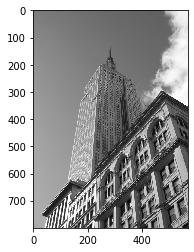

In [3]:
avg_kernel = np.ones((5,5), np.float32) / 25
avg_result = cv.filter2D(img_gray, -1, avg_kernel)

cv.imwrite('img_avg_filter.png', avg_result)
plt.imshow(img_gray, 'gray')

Read in second reference image with synthetic noise added and convert to grayscale

## Gaussian Filter Testing

get a 5x1 gaussian matrix from the cv.getGaussianKernel() function

In [4]:
gauss = cv.getGaussianKernel(5, 2.0)

Multiply it by itself transposed to make a 5x5 version

In [5]:
gaussian_kernel = np.multiply(gauss.T, gauss)

Apply the gaussian kernel to the empire.jpg image

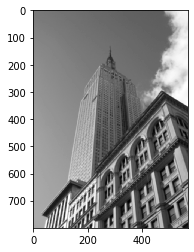

In [6]:
gauss_result = cv.filter2D(img_gray, -1, gaussian_kernel)

cv.imwrite('img_gaussian_filter.png', gauss_result)
plt.imshow(gauss_result, 'gray')

## Sobel Filter Testing

Define the 3x3 left and right sobel kernel matrices

In [7]:
left_sobel = np.float32([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) / 8
right_sobel = np.float32([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8

In [8]:
right_sobel

array([[-0.125,  0.   ,  0.125],
       [-0.25 ,  0.   ,  0.25 ],
       [-0.125,  0.   ,  0.125]], dtype=float32)

Apply the left_sobel 3x3 kernel to the image, write the result to a file and display the empire.jpg image.

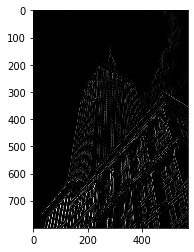

In [9]:
right_sobel_result = cv.filter2D(img_gray, -1, right_sobel)

cv.imwrite('img_right_sobel_filter.png', right_sobel_result)
plt.imshow(right_sobel_result, 'gray')

### Corner Filter Testing
First define a 3x3 corner kernel

In [10]:
corner_kernel = np.float32([[1, -2, 1], [-2, 4, -2], [1, -2, 1]]) / 4

Apply the 3x3 kernel to the image, write the result to a file and display the empire.jpg image.

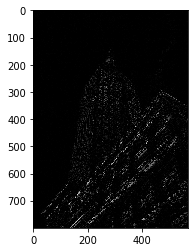

In [11]:
corner_kernel_result = cv.filter2D(img_gray, -1, corner_kernel)

cv.imwrite('img_corner_filter.png', corner_kernel_result)
plt.imshow(corner_kernel_result, 'gray')

### Median Blur testing

In [13]:
img_noise = cv.imread('./resources/empire_shotnoise.jpg')
img_noise_gray = cv.cvtColor(img_noise, cv.COLOR_BGR2GRAY)

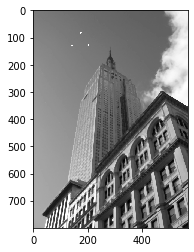

In [14]:
ksize = 5
med_result = cv.medianBlur(img_noise_gray, ksize)

cv.imwrite('img_median_filter.png', med_result)
plt.imshow(med_result, 'gray')

### Bilateral Filtering testing

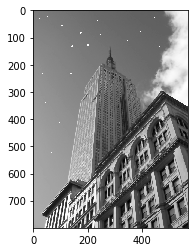

In [15]:
rad = 5 
sigma_s = 10 
sigma_c = 30
bil_result = cv.bilateralFilter(img_noise_gray, rad, sigma_c, sigma_s)

cv.imwrite('img_bilateral_filter.png', bil_result)
plt.imshow(bil_result, 'gray')

## 2. Edge Detection
#### 2.1 Edge Detection with Sobels

Horizontal Derivative

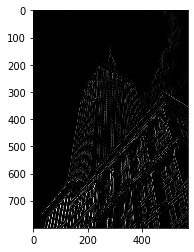

In [16]:
D_x = np.float32([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
der_x = cv.filter2D(img_gray, -1, D_x)

cv.imwrite('img_horizontal.png', der_x)
plt.imshow(der_x, 'gray')

Vertical Derivative

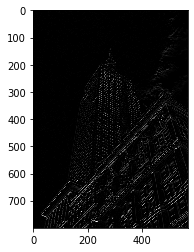

In [17]:
D_y = np.float32([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 8
der_y = cv.filter2D(img_gray, -1, D_y)

cv.imwrite('img_vertical.png', der_y)
plt.imshow(der_y, 'gray')

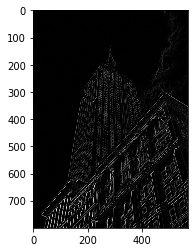

In [18]:
import math
height, width = img_gray.shape
mag_img_gray = np.zeros((height, width), np.float32) #gradient magnitude of img_gray
for i in range(0, height):
    for j in range(0, width):
        square_der_x = float(der_x[i, j]) * float(der_x[i, j])
        square_der_y = float(der_y[i, j]) * float(der_y[i, j])
        mag_img_gray[i, j] = int(math.sqrt(square_der_x + square_der_y))
        
cv.imwrite('img_magnitude.png', mag_img_gray)
plt.imshow(mag_img_gray,'gray')

### 2.2 Edge Detection with Canny edge detector

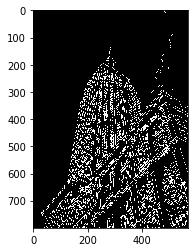

In [19]:
minVal = 100 #minVal used in hysteresis thresholding
maxVal = 200 #maxVal used in hysteresis thresholding
Canny_edges = cv.Canny(img_gray, minVal, maxVal)

cv.imwrite('img_canny.png', Canny_edges)
plt.imshow(Canny_edges, 'gray')